<a href="https://colab.research.google.com/github/skymined/study_data_analytics/blob/main/docs/quests/DDA/extract_5Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 코렙의 경우 설치 후 runtime  > restart 해야함

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [4]:
rank = pd.read_csv('/content/ShoppingMallDeliveryWithDate.csv')
rank

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231
...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800,445.0,1,모바일웹,20171229
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200,172.0,2,모바일웹,20171229
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.0,1,네이버 페이,20171230
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460,184.0,1,네이버 페이,20171231


In [6]:
rank_object = rank.describe(include=object)
rank_object

,결제수단,배송번호,배송시작일,배송완료일,주문경로
count,46749,46749,46749,46749,46749
unique,44,37691,1548,2559,3
top,무통장입금,D-20180316-0000178-00,2018-12-19 오후 5:36,2019-02-02 오전 5:32,PC쇼핑몰
freq,24171,7,388,547,25695


### 결제수단

In [26]:
rank_method = rank.sort_values(by=['결제수단'], ascending=True)
series_method = rank_method['결제수단'].value_counts()
series_method

무통장입금                 24171
카드                    13703
적립금,무통장입금              3374
쿠폰,카드                  1306
적립금,카드                 1276
쿠폰,무통장입금               1204
휴대폰                     430
실시간계좌이체                 322
예치금,무통장입금               175
가상계좌                    130
카드,무통장입금                100
카카오페이(카드)                77
쿠폰,휴대폰                   67
페이나우(카드)                 50
예치금,적립금,무통장입금            47
적립금,휴대폰                  37
적립금,가상계좌                 30
예치금,카드                   28
예치금                      25
카카오페이(카카오머니)             22
페이나우(실시간 계좌이체)           21
에스크로(실시간계좌이체)            20
적립금                      16
쿠폰,카카오페이(카드)             16
쿠폰,카드,무통장입금              13
쿠폰,페이나우(카드)              11
무통장입금,휴대폰                 9
적립금,페이나우(카드)              9
예치금,적립금,카드                8
적립금,카카오페이(카드)             7
쿠폰,에스크로(실시간계좌이체)          6
적립금,실시간계좌이체               6
예치금,쿠폰,무통장입금              6
예치금,휴대폰                   5
쿠폰,가상계좌                   4
예치금,쿠폰,카드           

<Axes: xlabel='결제수단', ylabel='count'>

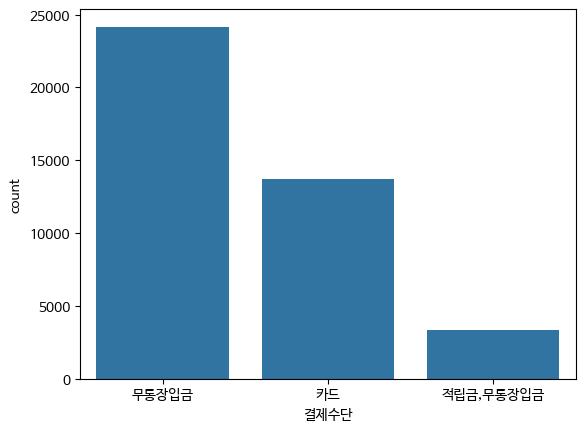

In [29]:
series_method_list_as = series_method.iloc[:3].index.to_list()
sns.countplot(data=rank, x='결제수단', order=series_method_list_as)

<Axes: xlabel='결제수단', ylabel='count'>

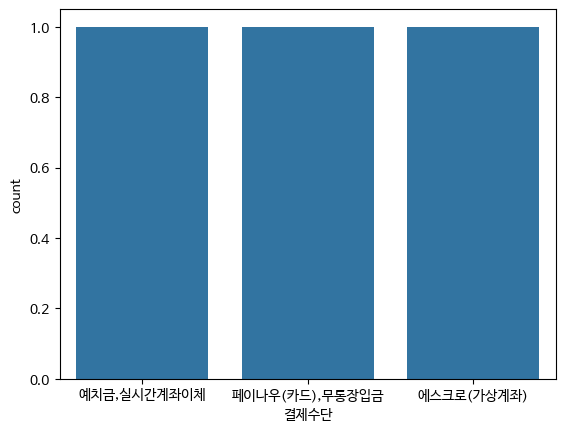

In [35]:
series_method_list_des = series_method.iloc[-3:].index.to_list()
sns.countplot(data=rank, x='결제수단', order =series_method_list_des )

### 배송번호

### 배송시작일

### 배송완료일

### 주문경로